# Lab 2- Matrix Inversion (Linear and Polynomial Data Modeling) and Model Performance Analysis

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Linear regression
 # y = beta_0 + beta_1*x

In [4]:
# Generate data 
x = np.linspace(0, 10,10)
#x = np.array(range(101))
alfa = 0.00
y = 3 + 2*x + alfa*np.random.random(len(x))

# Generate matrix
A = np.array([[len(x), np.sum(x)],
              [np.sum(x), np.sum(x*x)]])
B = np.array([[np.sum(y)],
              [np.sum(x*y)]])

C = np.dot(np.linalg.inv(A),B)
# Display the matrix
print('Matrix A =',A)
print('Matrix B =',B)
print('Intercept and Slope =',C)

Matrix A = [[ 10.          50.        ]
 [ 50.         351.85185185]]
Matrix B = [[130.       ]
 [853.7037037]]
Intercept and Slope = [[3.]
 [2.]]


In [5]:
# Model Accuracy Performance Analysis

intercept = C[0]
slope = C[1]
input = x
output = y

def R_Squared(input,output,intercept,slope):
    prediction = slope*x + intercept
    
    residual = output - prediction
    
    RES = (residual*residual).sum()
    
    REST = output - output.mean()
    
    TOT = (REST*REST).sum()
    
    return (1 - RES/TOT)
print(R_Squared(input, output, intercept, slope))

1.0


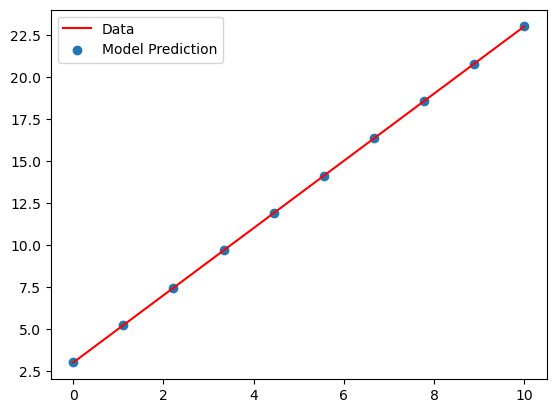

In [6]:
# Display Results, line (Data, x, and y) and Scatter ( x, and model predicted)
plt.plot(x,y, '-r') # Data
plt.scatter(x,C[0] + C[1]*x)  # Model Prediction
plt.legend([ 'Data', 'Model Prediction'], loc = 'upper left')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('LectureLinearRegression.xlsx')

x = np.array(df['x'])
y= np.array(df['y'])

print()


# Import required package
import numpy as np
 
# Taking a 2 * 2 matrix
A = np.array([[len(x), np.sum(x)],
              [np.sum(x), np.sum(x*x)]])
             
   
B = np.array([[np.sum(y)],
              [np.sum(x*y)]])
             

C = np.dot(np.linalg.inv(A),B)


print(A)
print(B)
print(C)



[[  50.          360.25748272]
 [ 360.25748272 3496.261206  ]]
[[ 8314.74483171]
 [59908.98085139]]
[[166.29489663]
 [  0.        ]]


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#df = pd.read_excel('LectureLinearRegression.xlsx')
#x = np.array(df['x '])+ alfa*np.random.random(len(y))
#y= np.array(df['y'])

#alfa = 0
#x = df['x'] + alfa*np.random.random(len(y))
#y= df['y']

# Case 2: Generate Data
uo = 100
angle = 45
rad = 3.14*angle/180

x = np.linspace(0, 2*uo*np.sin(rad)/9.81)
y = uo*np.sin(rad)*x- 0.5*9.81*x**2


# Generate a 3 * 3 matrix
A = np.array([[len(x), np.sum(x), np.sum(x*x)],
              [np.sum(x), np.sum(x*x),np.sum(x*x*x)],
              [np.sum(x*x), np.sum(x*x*x), np.sum(x*x*x*x)]])
 
B = np.array([[np.sum(y)],
              [np.sum(x*y)],
             [np.sum(x*x*y)]])

C = np.dot(np.linalg.inv(A),B)

print(A)
print(B)
print(C)

[[5.00000000e+01 3.60257483e+02 3.49626121e+03]
 [3.60257483e+02 3.49626121e+03 3.81683109e+04]
 [3.49626121e+03 3.81683109e+04 4.44442884e+05]]
[[  8314.74483171]
 [ 59908.98085139]
 [517839.98275462]]
[[ 1.36424205e-12]
 [ 7.06825181e+01]
 [-4.90500000e+00]]


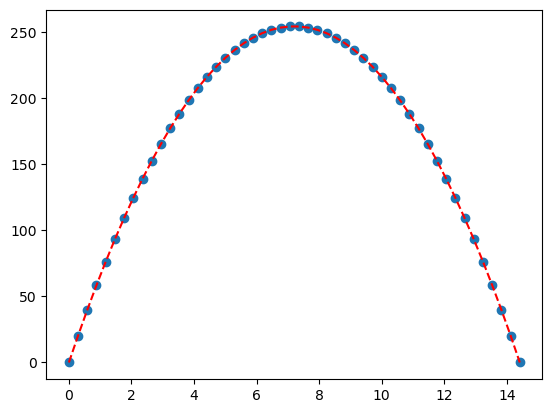

In [9]:
# Display

plt.plot(x, C[0] + C[1]*x + C[2]*x**2, 'r--')
plt.scatter(x,y)


In [10]:
# Model Perofrmance analysis

input = x
output = y

intercept = C[0]
coef1 = C[1]
coef2 = C[2]

def r2(input, output, intercept, coef1, coef2):
    prediction = intercept + coef1*x + coef2*x**2
    residual = output - prediction
    RST = (residual*residual).sum()
    RSST = output - output.mean()
    TOS = (RSST*RSST).sum()
    return 1-RST/TOS
print(r2(x, y, intercept, coef1, coef2))

1.0


In [11]:
# Library- Sklearn....Scikit Learn

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # has .fit() to fit model and compute coeff. and .predict () to pred y for xtest
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#def linear(x):
#    return 3 + 2*x + alfa*np.random.random(len(x))

#alfa = 0.9
#x = np.linspace(0,10, 100)

#y=linear(x)
#df = pd.DataFrame({'x':x, 'y':y})
#df.to_excel('example2.xlsx', index = False)


# Generate data 
x = np.linspace(0, 50,10)
#x = np.array(range(101))
alfa = 0.00
y = 3 + 2*x + alfa*np.random.random(len(x))

X = x.reshape(-1,1)
y=y.reshape(-1,1)

In [14]:
#df=pd.read_excel('example2.xlsx')
#df.info()

In [15]:
# split data
#X = df[['Vs', 'DEN', 'NEU']]
#X = df[['x']] # Use double bracket
#y= df['y']

In [16]:
#X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.3, shuffle = True)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.7)

In [17]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [18]:
print('r2:', r2_score(y_test,y_pred))

r2: 1.0


In [19]:
print(reg.coef_,reg.intercept_)

[[2.]] [3.]


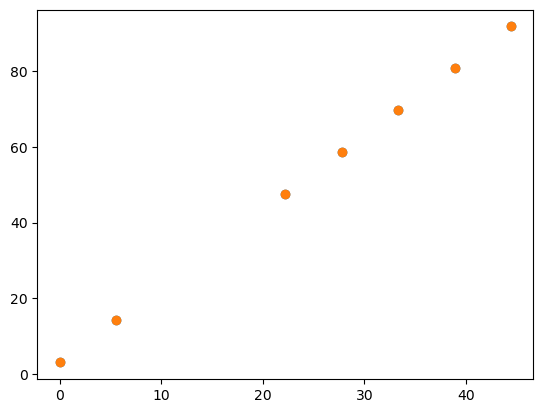

In [20]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)

r2: 1.0
[[2.]] [3.]


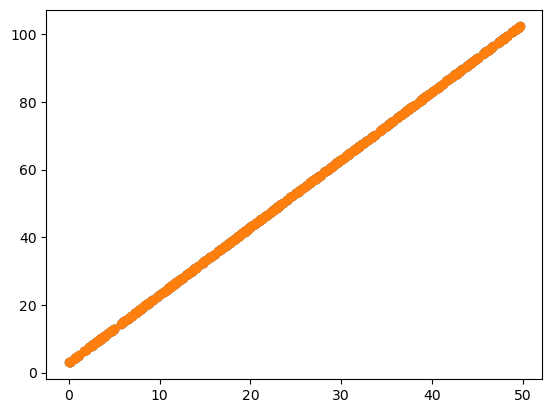

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # has .fit() to fit model and compute coeff. and .predict () to pred y for xtest
from sklearn.metrics import mean_squared_error, r2_score

#Generate Data
x = np.linspace(0, 50,1200)
#x = np.array(range(101))
alfa = 0.00
y = 3 + 2*x + alfa*np.random.random(len(x))

X = x
X = x.reshape(-1,1)
y=y.reshape(-1,1)

# Create DataFrame
#df = pd.DataFrame({'x':x, 'y': y})
#df.to_excel('Test1.xlsx', index = False)
#df = pd.read_excel('Test1.xlsx')
#X = x.reshape(-1,1)
#X = np.array(df['x']).reshape(-1,1)
#y= np.array(df['y']).reshape(-1,1)


# Split data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.3)
# Model and Predict
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

# Model Performance
print('r2:', r2_score(y_test,y_pred))
# Print coefficients
print(reg.coef_,reg.intercept_)
# Plot
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
#plt.plot(X_test, y_test.mean())

In [22]:
X

array([[0.00000000e+00],
       [4.17014178e-02],
       [8.34028357e-02],
       ...,
       [4.99165972e+01],
       [4.99582986e+01],
       [5.00000000e+01]])

In [23]:
y

array([[  3.        ],
       [  3.08340284],
       [  3.16680567],
       ...,
       [102.83319433],
       [102.91659716],
       [103.        ]])